In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating Dataset
mean_01 = np.array([0, 1])
cov_01 = np.array([[0.6,0.3], [0.3, 0.9]])

mean_02 = np.array([4, 2])
cov_02 = np.array([[1.2,-0.23], [-0.23, 0.4]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

In [3]:
actual_means = np.asarray([dist_01.mean(axis=0), dist_02.mean(axis=0)])
print(actual_means)

[[0.02385212 1.03948889]
 [3.94361893 1.97421122]]


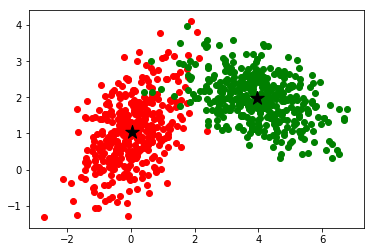

In [4]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.scatter(actual_means[:, 0], actual_means[:, 1], color='black', marker='*', s=200)
plt.show()

In [73]:
class Cluster:
    cid = 0 # Cluster ID
    
    def __init__(self, center, color, *args, **kwargs):
        self.center = center
        self.color = color
        self.points = list()
        self.center_shifts = list()
        self.id = Cluster.cid
        Cluster.cid += 1
        
    def __del__(self):
        print("Deleting Cluster", self.id)
    
    def add_point(self, point):
        self.points.append(point)
    
    def update_center(self):
        if len(self.points):
            new_mean = np.asarray(self.points).mean(axis=0)
            self.center_shifts.append(KMeansClustering.euclidean(self.center, new_mean))
            self.center = new_mean
        return self.center
    
    def __str__(self):
        return "<Cluster {} [{}]> {}".format(self.id, self.color, self.center)
    
    def __repr__(self):
        return "<Cluster {} [{}]> {}".format(self.id, self.color, self.center)

In [74]:
class KMeansClustering:
    
    def __init__(self, k, centers, X_data, colors, *args, **kwargs):
        self.k = k
        self.centers = centers
        self.X_data = X_data
        self.colors = colors
        self.clusters = list()
        self.inertias = list()
        self.iterations = 0
        
        for i in range(k):
            self.clusters.append(Cluster(center=centers[i], color=colors[i]))    
    
    def assign_clusters(self):
        for point in self.X_data:
            distances = []
            for cluster in self.clusters:
                if not len(cluster.center):
                    distances.append((np.inf, cluster))
                    continue
                distances.append((KMeansClustering.euclidean(point, cluster.center), cluster))
            closest_cluster = sorted(distances, key=lambda x: x[0])[0][1]
            closest_cluster.add_point(point)
        
        for cluster in self.clusters:
            print(cluster, "{} points".format(len(cluster.points)))
            
    def update_clusters_mean(self):
        for i,cluster in enumerate(self.clusters):
            self.centers[i] = cluster.update_center()
            
    def empty_clusters(self):
        for cluster in self.clusters:
            cluster.points = list()
            
    def calculate_inertia(self):
        inertia = 0
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeansClustering.euclidean(np.asarray(point), cluster.center)
        return inertia

    def run(self, iterations=1):
        for _ in range(iterations):
            self.empty_clusters()
            self.assign_clusters()
            self.update_clusters_mean()
            self.inertias.append(self.calculate_inertia())
            self.iterations += 1
    
    @staticmethod
    def euclidean(p1, p2):
        return np.sqrt(np.sum((p1-p2)**2))

In [75]:
def plot_clusters(obj):
    '''Works only for 2D'''
    plt.figure()
    
    if obj.iterations == 0:
        # KMeans hasn't been run yet. Plot the initial state
        plt.scatter(obj.X_data[:, 0], obj.X_data[:, 1])
        for cluster in obj.clusters:
            plt.scatter(cluster.center[0], cluster.center[1], color='black', marker='^', s=100)
    else:        
        for cluster in obj.clusters:
            points = np.asarray(cluster.points)
            if len(points):
                plt.scatter(points[:, 0], points[:, 1], color=cluster.color)
            plt.scatter(cluster.center[0], cluster.center[1], color='black', marker='^', s=200)
    plt.show()
    
def plot_shifts(obj):
    plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel('Distance')
    plt.title('Center Displacement')
    for cluster in obj.clusters:
        plt.plot(cluster.center_shifts, color=cluster.color, label="Cluster {}".format(cluster.id))
    plt.legend()
    plt.show()

In [76]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
dataset.shape

(800, 2)

In [77]:
dataset[:dist_01.shape[0], :] = dist_01
dataset[dist_01.shape[0]:, :] = dist_02

In [78]:
k = 5
dim = dataset.shape[1]
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'purple', 'brown', 'orange', 'magenta', 'cyan', 'gray']
inertias = []
random_centers = np.random.uniform(low=dataset.min(), high=dataset.max(), size=(k, dim))

In [79]:
kmeans = KMeansClustering(k=k, centers=random_centers, X_data=dataset, colors=colors)
kmeans

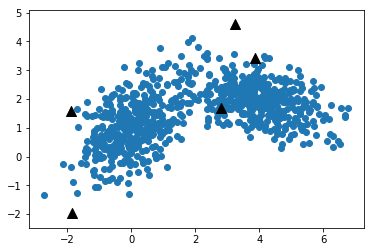

In [80]:
plot_clusters(kmeans)

<Cluster 0 [red]> [1.5261657  2.48428532] 86 points
<Cluster 1 [green]> [5.08622367 1.61391894] 143 points
<Cluster 2 [blue]> [-0.53087646  0.14855526] 147 points
<Cluster 3 [yellow]> [3.53565344 2.10746414] 220 points
<Cluster 4 [pink]> [0.13261126 1.35321033] 204 points
<Cluster 0 [red]> [1.5261657  2.48428532] 86 points
<Cluster 1 [green]> [5.09065826 1.60885362] 143 points
<Cluster 2 [blue]> [-0.53087646  0.14855526] 147 points
<Cluster 3 [yellow]> [3.539819   2.10851321] 220 points
<Cluster 4 [pink]> [0.13261126 1.35321033] 204 points
<Cluster 0 [red]> [1.5261657  2.48428532] 86 points
<Cluster 1 [green]> [5.09065826 1.60885362] 143 points
<Cluster 2 [blue]> [-0.53087646  0.14855526] 147 points
<Cluster 3 [yellow]> [3.539819   2.10851321] 220 points
<Cluster 4 [pink]> [0.13261126 1.35321033] 204 points
<Cluster 0 [red]> [1.5261657  2.48428532] 86 points
<Cluster 1 [green]> [5.09065826 1.60885362] 143 points
<Cluster 2 [blue]> [-0.53087646  0.14855526] 147 points
<Cluster 3 [yellow

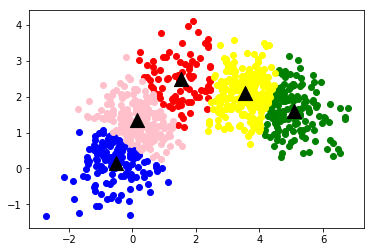

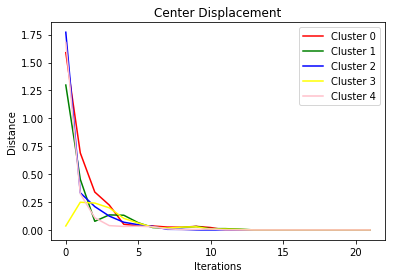

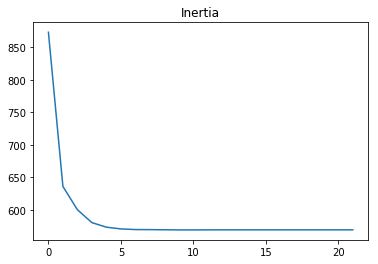

In [86]:
kmeans.run(10)
print("Last Iteration Inertia: ", kmeans.inertias[-1])

plot_clusters(kmeans)
plot_shifts(kmeans)

plt.figure()
plt.title("Inertia")
plt.plot(kmeans.inertias)
plt.show()

In [87]:
kmeans.iterations

22

In [88]:
kmeans.centers

array([[ 1.5261657 ,  2.48428532],
       [ 5.09065826,  1.60885362],
       [-0.53087646,  0.14855526],
       [ 3.539819  ,  2.10851321],
       [ 0.13261126,  1.35321033]])

# SKLearn KMeans

In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans_sk = KMeans(n_clusters=5)
kmeans_sk

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
kmeans_sk.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [92]:
kmeans_sk.cluster_centers_

array([[ 0.20238026,  1.40617266],
       [ 3.5900616 ,  2.11576099],
       [ 5.10846361,  1.58826797],
       [ 1.71576815,  2.49207616],
       [-0.54176097,  0.20236441]])

In [93]:
kmeans_sk.labels_

array([3, 0, 4, 0, 3, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 4,
       4, 0, 4, 0, 0, 4, 0, 4, 0, 4, 4, 3, 0, 4, 4, 4, 4, 3, 3, 4, 0, 4,
       0, 4, 0, 4, 0, 3, 0, 4, 3, 0, 4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4,
       0, 0, 4, 0, 0, 3, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 4, 0, 0, 4, 4, 3, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 4, 3, 4, 0, 0, 4, 4, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 3, 0, 4, 4, 0, 4, 0, 0, 0, 0, 4, 4,
       0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 4, 3, 4, 3, 4, 3, 0, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 4, 4, 0,
       4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 3, 0, 4, 4, 0, 4, 4,
       0, 3, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 4, 3, 3, 3,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0,
       3, 4, 0, 3, 3, 3, 4, 0, 0, 0, 0, 4, 4, 0, 0,

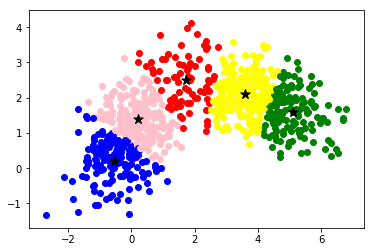

In [95]:
plt.figure()
sk_colors = {0: 'pink', 1: 'yellow', 2: 'green', 3: 'red', 4: 'blue'}
for i,point in enumerate(dataset):
    plt.scatter(point[0], point[1], color=sk_colors[kmeans_sk.labels_[i]])
for center in kmeans_sk.cluster_centers_:
    plt.scatter(center[0], center[1], color='black', s=100, marker='*')
plt.show()